# Aula 01 - Introdução a Classificação

In [0]:
# Features
# [pelo longo, perna curta, faz auau]
# para cada feature, 0 significa não é porco, 1 signica é porco

porco1 = [0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]

cachorro1 = [0,1,1]
cachorro2 = [1,0,1]
cachorro3 = [1,1,1]

#Features para treino
train_x = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]

#Classificação para treino
train_y = [1,1,1,0,0,0]

In [0]:
#Modelo básico de treinamento Linear
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(train_x, train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
#Exemplo de um animal desconhecido
animal1 = [1,1,1]

#Previsão do modelo. No caso retornou array([0]), significando que o modelo classificou como não é porco
model.predict([animal1])

array([0])

In [0]:
#Vários modelos de animais desconhecidos
animal2 = [1,1,1]
animal3 = [1,1,0]
animal4 = [0,1,1]
teste_x = [animal2, animal3, animal4]

#Resposta para os animais citados acima
teste_y = [0,1,1]

In [0]:
#Modelo faz a previsão
previsoes = model.predict(teste_x)

In [0]:
#Modo manual calculando a a acurácia do modelo de previsão
corretos = (previsoes == teste_y).sum()
total = len(teste_x)
taxa_acerto = corretos/total
print("Taxa de acerto: ", taxa_acerto * 100)

Taxa de acerto:  66.66666666666666


In [0]:
#Módulo do SKLearn que calcula a acurácia do modelo de previsão
from sklearn.metrics import accuracy_score

taxa_acerto = accuracy_score(teste_y, previsoes)
print("Taxa de acerto: ", taxa_acerto * 100)

Taxa de acerto:  66.66666666666666


# Aula 2 - Testes Reaplicáveis, estratificação e lendo dados da internet

In [0]:
#Lê arquivos
import pandas as pd 

uri='https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'

dados = pd.read_csv(uri)

In [0]:
#Troca os nomes das colunas
map = {
    "home": "pagina_inicial",
    "how_it_works": "como_funciona",
    "contact": "contato",
    "bought": "comprou"
}

dados = dados.rename(columns=map)

In [0]:
#Separa as Features do dataframe
x = dados[['pagina_inicial', 'como_funciona', 'contato']]
x.head()

,pagina_inicial,como_funciona,contato
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [0]:
# Separa as classificações do dataframe
y = dados['comprou']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [0]:
#Faz a separação manual dos dados de treino e de teste
treino_x = x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]

In [0]:
#Construção do modelo de previsão linear
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model = LinearSVC()
model.fit(treino_x, treino_y)
predict_x = model.predict(teste_x)

taxa_acuracy = accuracy_score(teste_y, predict_x) * 100
print("A taxa de acurácia foi de %.2f%%" % taxa_acuracy)

A taxa de acurácia foi de 95.83%


In [0]:
#Faz a separação dos dados de treino e teste pelo módulo train_test_split, travando o random_state para que a separação não seja aleatória
#Caso não seja travado o random_state, a cada vez que o modelo é rodado, ele oferece um resultado diferente
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, random_state = SEED, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_y)))

model = LinearSVC()
model.fit(treino_x, treino_y)
predict_x = model.predict(teste_x)

taxa_acuracy = accuracy_score(teste_y, predict_x) * 100
print("A taxa de acurácia foi de %.2f%%" % taxa_acuracy)

Treinaremos com 74 elementos e testaremos com 25 elementos
A taxa de acurácia foi de 96.00%


# Aula 3 - Um projeto de baixa dimensionalidade e o baseline

In [0]:
#Importa arquivos
import pandas as pd 
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

In [0]:
#Troca os nomes das colunas
map = {
    'unfinished': 'nao_finalizado',
    'expected_hours': 'horas_esperadas',
    'price': 'preco'
}

dados = dados.rename(columns=map)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [0]:
#Inverte os dados da coluna nao_finalizado
swap = {1:0, 0:1}

dados['finalizados'] = dados.nao_finalizado.map(swap)
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizados
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


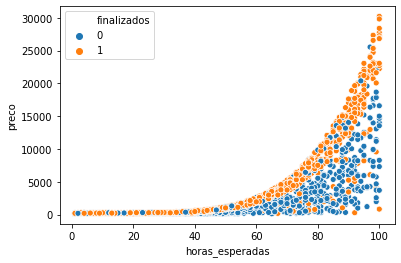

In [0]:
#Plotagem em gráficos dos dados acima
import seaborn as sns

sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizados', data=dados)

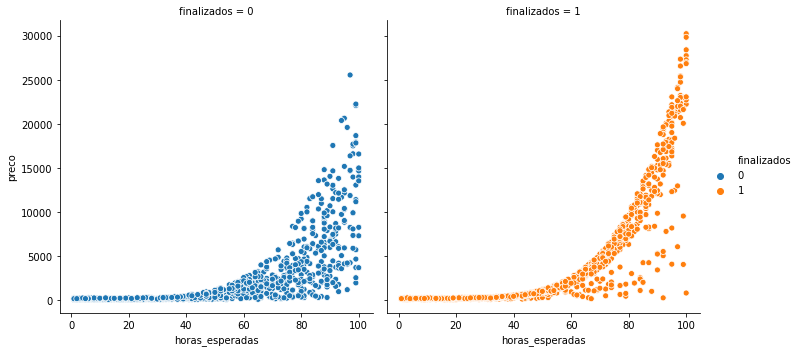

In [0]:
sns.relplot(x='horas_esperadas', y='preco', hue='finalizados', col='finalizados', data=dados)

In [0]:
#Separa as features e a classificação dos dados
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizados']

In [0]:
#Modelo de treinamento dos dados
#O mais correto, como visto neste modelo, e a definição do random_state pelo módulo do numpy. Desta forma, todos os modulos que tiverem 
#a propriedade random_state (neste caso o train_test_split e o LinearSVC) estarão configurados com o valor definido pelo SEED
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_y)))

model = LinearSVC()
model.fit(treino_x, treino_y)
predict_x = model.predict(teste_x)

taxa_acuracy = accuracy_score(teste_y, predict_x) * 100
print("A taxa de acurácia foi de %.2f%%" % taxa_acuracy)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A taxa de acurácia foi de 64.44%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
#Definição do Y como sendo todos os dados como "1", para testar a acurácia
#Este teste é importante pois o modelo de previsão deve ser melhor do apenas chutar um único resultado possível.
import numpy as np

baseline = np.ones(540)

taxa_acuracy = accuracy_score(teste_y, baseline) * 100
print("A taxa de acurácia da baseline foi de %.2f%%" % taxa_acuracy)

A taxa de acurácia da baseline foi de 52.59%


In [0]:
#Mínimos e máximos do teste_x
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [0]:
#Defini os pontos em pixels que serão coloridos no gráfico
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [0]:
#Treina um modelo com os dados definidos acima e coloca a previsão no mesmo formato da variável xx
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

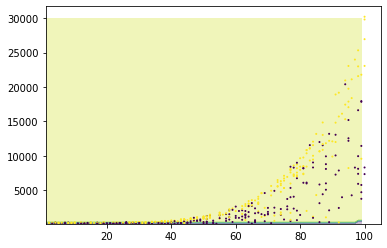

In [0]:
#Como pode-se ver no gráfico, os dados não são lineares. Quando usamos um modelo de previsão linear para dados não lineares, o modelo não
#é capaz de fazer uma boa previsão e leitura dos dados. Por isso é preciso alterar o modelo de treinamento.
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# Aula 4 - Support Vector Machine e a não linearidade

In [0]:
#Modelo de treinamento. Neste foi usado o modulo SVC para fazer a previsão
#Mais algumas adaptações foram feitas para treinar o modelo não_linearmente
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_y)))

#Os dados de treino e teste estão em escalas diferentes, por isso, é usado um modulo que treina com os dados oferecidos e 
#transforma os dados para que fiquem em uma mesma escala de valor, tanto os de treino, quanto os de teste.
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

model = SVC()
model.fit(treino_x, treino_y)
predict_x = model.predict(teste_x)

taxa_acuracy = accuracy_score(teste_y, predict_x) * 100
print("A taxa de acurácia foi de %.2f%%" % taxa_acuracy)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A taxa de acurácia foi de 66.85%


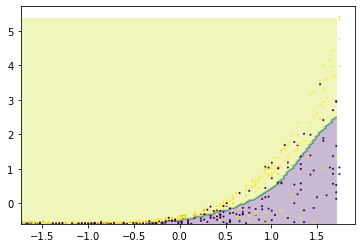

In [0]:
#Faz a preparação dos dados para fazer a plotagem. Diferente do treinamento anterior, esse treinamento soube enxergar os dados como não-lineares
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)